In [1]:
import pypsa
import numpy as np
import matplotlib.pyplot as plt

network = pypsa.Network()

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
network.add("Bus",
            name="bus 1",
            v_nom=10.0,        # Nominal voltage in kV (optional, default is 1.0)
            x=0.0,              # x-coordinate for plotting (optional)
            y=0.0,              # y-coordinate for plotting (optional)
            carrier="AC"        # Type of network (optional, e.g., "AC", "DC")
)

Index(['bus 1'], dtype='object')

In [3]:
network.add("Bus",
            name="bus 2",
            v_nom=10.0,        # Nominal voltage in kV (optional, default is 1.0)
            x=0.0,              # x-coordinate for plotting (optional)
            y=0.0,              # y-coordinate for plotting (optional)
            carrier="AC"        # Type of network (optional, e.g., "AC", "DC")
)

Index(['bus 2'], dtype='object')

In [4]:
network.add("Bus",
            name="bus 3",
            v_nom=10.0,        # Nominal voltage in kV (optional, default is 1.0)
            x=0.0,              # x-coordinate for plotting (optional)
            y=0.0,              # y-coordinate for plotting (optional)
            carrier="AC"        # Type of network (optional, e.g., "AC", "DC")
)

Index(['bus 3'], dtype='object')

In [5]:
network.add("Line",
            name="line 1-2",
            bus0="bus 1",
            bus1="bus 2",
            x=0.04,
            r=0.02,
            length=1.0,  # Optional, default is 1.0
            s_nom=100  # Optional, nominal power rating
)

Index(['line 1-2'], dtype='object')

In [6]:
network.add("Line",
            name="line 2-3",
            bus0="bus 2",
            bus1="bus 3",
            x=0.025,
            r=0.0125,
            length=1.0,  # Optional, default is 1.0
            s_nom=100  # Optional, nominal power rating
)

Index(['line 2-3'], dtype='object')

In [7]:
network.add("Line",
            name="line 3-1",
            bus0="bus 1",
            bus1="bus 3",
            x=0.030,
            r=0.01,
            length=1.0,  # Optional, default is 1.0
            s_nom=100  # Optional, nominal power rating
)

Index(['line 3-1'], dtype='object')

In [8]:
network.add("Generator",
            name="slack_generator",
            bus="bus 1",
            control="Slack",
            p_set=0,
            v_nom=10.0)

Index(['slack_generator'], dtype='object')

In [9]:
network.add("Generator",
            name="PQ_generator",
            bus="bus 3",
            control="Slack",
            p_set=200,
            v_nom=10.0)

Index(['PQ_generator'], dtype='object')

In [10]:
network.add("Load",
            name="load ",
            bus="bus 2",
            p_set=400,      # 50 MW active power consumption
            q_set=250)  

Index(['load '], dtype='object')

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x000001D4F19D3680> for snapshots Index(['now'], dtype='object', name='snapshot')
C:\Users\ashut\AppData\Local\Temp\ipykernel_32128\3134191647.py:10: DeprecatedWarning:

plot is deprecated. Use `n.plot.map()` as a drop-in replacement instead.



Bus       bus 1     bus 2     bus 3
snapshot                           
now         0.0 -0.054477 -0.014093
Bus       bus 1     bus 2  bus 3
snapshot                        
now         1.0  0.924003    1.0
            line 1-2   line 2-3   line 3-1
snapshot                                  
now       177.991723 -230.52536  42.375658
Generator  slack_generator  PQ_generator
snapshot                                
now             220.367381         200.0


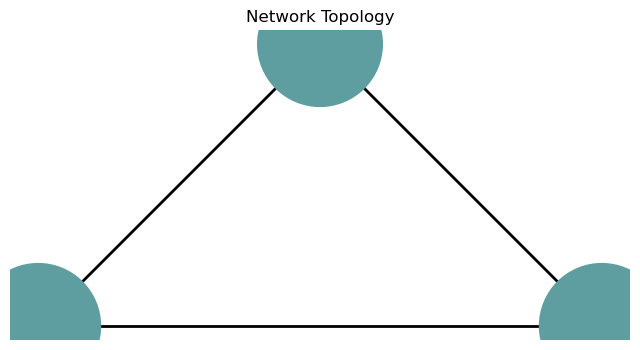

In [11]:
network.pf()

# Display results
print(network.buses_t.v_ang)  # Bus voltage angles
print(network.buses_t.v_mag_pu)  # Bus voltage magnitudes (in per unit)
print(network.lines_t.p0)  # Active power flow on lines (from bus0 to bus1)
print(network.generators_t.p)  # Generator power output

fig, ax = plt.subplots(figsize=(8, 6))
network.plot(ax=ax, line_colors='black', bus_sizes=0.05, line_widths=2.0)
plt.title("Network Topology")
plt.show()